In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
import sys
from numpy.polynomial.legendre import legfit, legval

from matplotlib.gridspec import GridSpec


import matplotlib as mpl
mpl.rcParams['font.serif'] = "Bitstream Vera Serif"
mpl.rcParams['font.family'] = "serif"
mpl.rcParams['font.size'] = 18


In [2]:
num_phi = 326
phi_offset = 15
GDPpro = np.load('GDPpro_kmeans_pca_run102_discardAsym.npy')
ALFpro = np.load('ALFpro_kmeans_pca_run121_discardAsym.npy')
GDPbuf = np.load('GDPbuf_kmeans_pca_run106_discardAsym.npy')
ALFbuf= np.load('ALFbuf_kmeans_pca_run119_discardAsym.npy')


cpsi = np.load('/reg/neh/home/qiaoshen/run16_notebooks/encodeZ400_cpsi.npy')[10:33, phi_offset:num_phi/2-phi_offset]
qs = np.load('/reg/neh/home/qiaoshen/run16_notebooks/encodeZ400_qvalue.npy')[10:33]

GDP=GDPpro-GDPbuf
ALF = ALFpro-ALFbuf

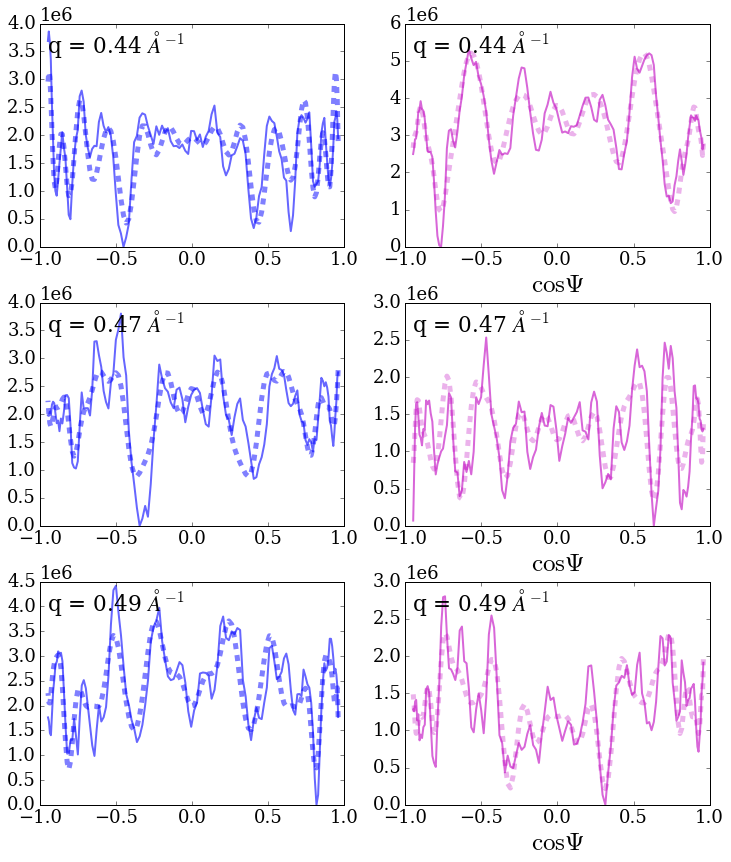

In [6]:
qinds=[0,1,2]
# plt.plot(cpsi[qidx],GDP[qidx],'--')
plt.figure(figsize=[12,14])
# plt.suptitle('pro-buf shots', fontsize=25)
gs = GridSpec(3,2)
gs.update(hspace=0.25)
leg_deg=range(0,40,2)

for ii,qidx in enumerate(qinds):
    ax=plt.subplot(gs[ii,0])
    ax.set_title("q = %.2f $\AA^{-1}$"%qs[qidx], x= 0.25,y =0.85, color='Black')
    x = cpsi[qidx]
    y1 = GDP[qidx]
    y1-=y1.min()
    

    cc=legfit(x,y1,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.5,color='b')
    plt.plot(cpsi[qidx],y1,'b-', alpha=0.6, linewidth=2)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    

    ax=plt.subplot(gs[ii,1])
    ax.set_title("q = %.2f $\AA^{-1}$"%qs[qidx], x= 0.25,y =0.85, color='Black')
    y2 = ALF[qidx]
    y2-=y2.min()
    cc=legfit(x,y2,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.3,color='m')

    plt.plot(cpsi[qidx],y2,'m-', alpha=0.6, linewidth=2)
    plt.xlabel('$\cos{\Psi}$', fontsize = 25)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.savefig('GDP_ALF_calibrated_q%.2f_q%.2f.png'%(qs[qinds[0]],qs[qinds[1]]), bbox_in_inches='tight')

In [7]:
ls *png

GDP_ALF_calibrated_q0.44_q0.47.png  GDP_ALF_calibrated_q0.74_q0.76.png
GDP_ALF_calibrated_q0.54_q0.56.png  GDP_ALF_calibrated_q0.81_q0.83.png
GDP_ALF_calibrated_q0.60_q0.63.png  GDP_ALF_calibrated_q0.87_q0.90.png
GDP_ALF_calibrated_q0.67_q0.70.png


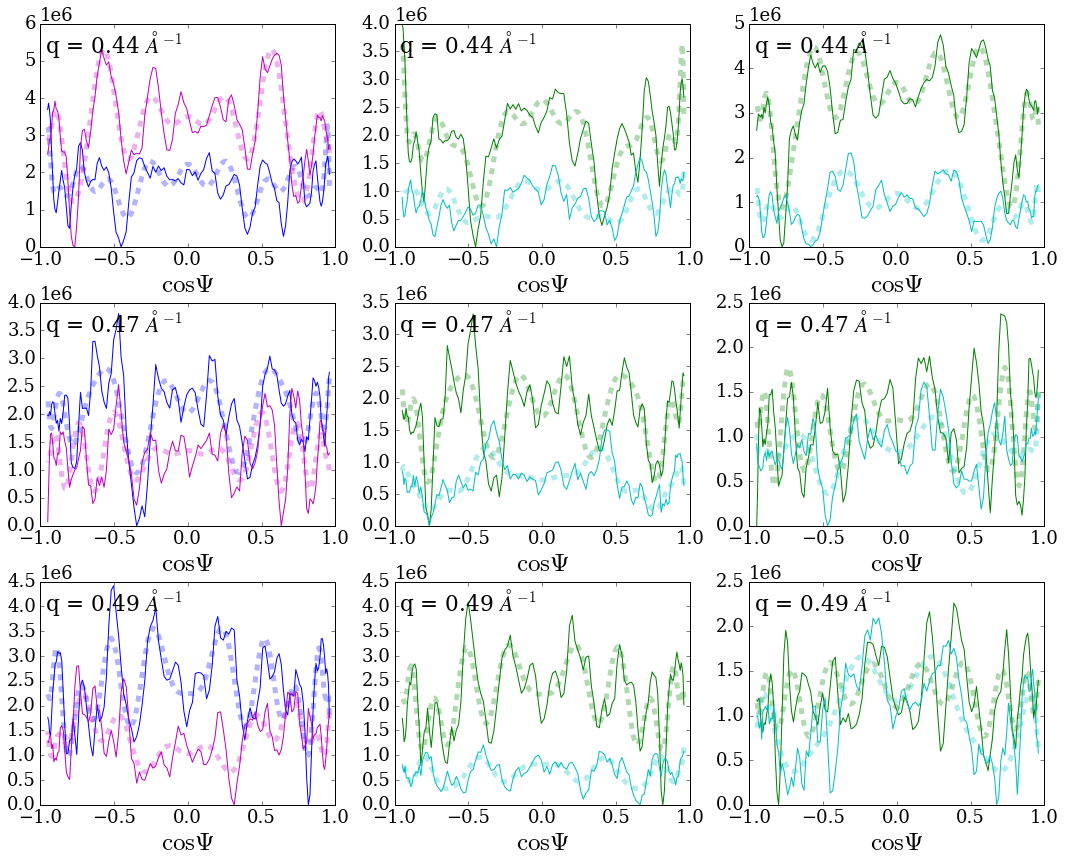

In [8]:
plt.figure(figsize=[18,14])
# plt.suptitle('pro-buf shots', fontsize=25)
gs = GridSpec(3,3)
gs.update(hspace=0.25)

#########################################difference of pro and buf
for ii,qidx in enumerate(qinds):
    ax=plt.subplot(gs[ii,0])
    ax.set_title("q = %.2f $\AA^{-1}$"%qs[qidx], x= 0.25,y =0.85, color='Black')
    x = cpsi[qidx]
    y1 = GDP[qidx]
    y1-=y1.min()
#     y1=0.5*(y1[:])

    leg_deg=range(0,24,2)

    cc=legfit(x,y1,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.3,color='b')
    plt.plot(cpsi[qidx],y1,'b-')


    y2 = ALF[qidx]
    y2-=y2.min()
    cc=legfit(x,y2,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.3,color='m')

    plt.plot(cpsi[qidx],y2,'m-')
    plt.xlabel('$\cos{\Psi}$', fontsize = 25)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
#########################################GDP sample
for ii,qidx in enumerate(qinds):
    ax=plt.subplot(gs[ii,1])
    ax.set_title("q = %.2f $\AA^{-1}$"%qs[qidx], x= 0.25,y =0.85, color='Black')
    x = cpsi[qidx]
    y1 = GDPpro[qidx]
    y1-=y1.min()
#     y1=0.5*(y1[:])

    leg_deg=range(0,24,2)

    cc=legfit(x,y1,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.3,color='g')
    plt.plot(cpsi[qidx],y1,'g-')


    y2 = GDPbuf[qidx]
    y2-=y2.min()
    cc=legfit(x,y2,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.3,color='c')

    plt.plot(cpsi[qidx],y2,'c-')
    plt.xlabel('$\cos{\Psi}$', fontsize = 25)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#########################################ALf samples
for ii,qidx in enumerate(qinds):
    ax=plt.subplot(gs[ii,2])
    ax.set_title("q = %.2f $\AA^{-1}$"%qs[qidx], x= 0.25,y =0.85, color='Black')
    x = cpsi[qidx]
    y1 = ALFpro[qidx]
    y1-=y1.min()
#     y1=0.5*(y1[:])

    leg_deg=range(0,24,2)

    cc=legfit(x,y1,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.3,color='g')
    plt.plot(cpsi[qidx],y1,'g-')


    y2 = ALFbuf[qidx]
    y2-=y2.min()
    cc=legfit(x,y2,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.3,color='c')

    plt.plot(cpsi[qidx],y2,'c-')
    plt.xlabel('$\cos{\Psi}$', fontsize = 25)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.savefig('q%.2f_q%.2f_calibrated_intensities_pca.png'(qs[qinds[0]],qs[qinds[-1]]), bbox_in_inches='tight')

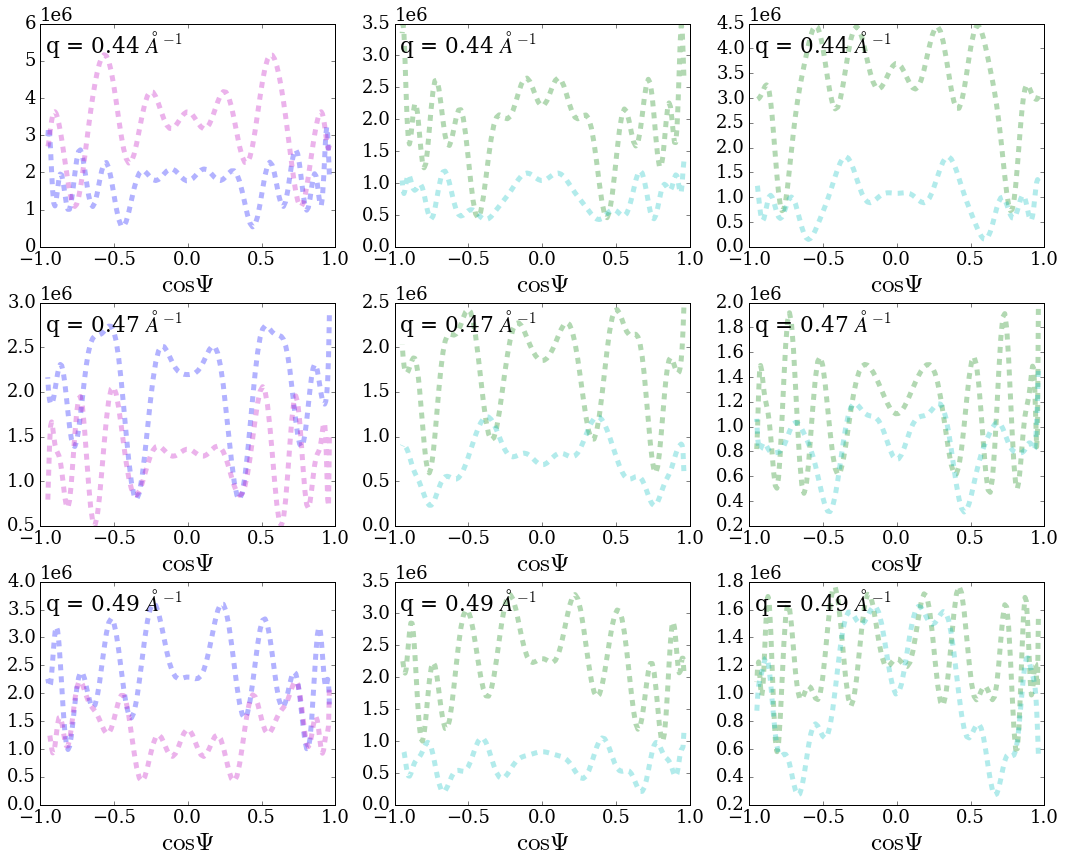

In [9]:
plt.figure(figsize=[18,14])
# plt.suptitle('pro-buf shots', fontsize=25)
gs = GridSpec(3,3)
gs.update(hspace=0.25)
leg_deg=range(0,30,2)
#########################################difference of pro and buf
for ii,qidx in enumerate(qinds):
    ax=plt.subplot(gs[ii,0])
    ax.set_title("q = %.2f $\AA^{-1}$"%qs[qidx], x= 0.25,y =0.85, color='Black')
    x = cpsi[qidx]
    y1 = GDP[qidx]
    y1-=y1.min()
#     y1=0.5*(y1[:])


    cc=legfit(x,y1,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.3,color='b')
#     plt.plot(cpsi[qidx],y1,'b-')


    y2 = ALF[qidx]
    y2-=y2.min()
    cc=legfit(x,y2,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.3,color='m')

#     plt.plot(cpsi[qidx],y2,'m-')
    plt.xlabel('$\cos{\Psi}$', fontsize = 25)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
#########################################GDP sample
for ii,qidx in enumerate(qinds):
    ax=plt.subplot(gs[ii,1])
    ax.set_title("q = %.2f $\AA^{-1}$"%qs[qidx], x= 0.25,y =0.85, color='Black')
    x = cpsi[qidx]
    y1 = GDPpro[qidx]
    y1-=y1.min()
#     y1=0.5*(y1[:])



    cc=legfit(x,y1,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.3,color='g')
#     plt.plot(cpsi[qidx],y1,'g-')


    y2 = GDPbuf[qidx]
    y2-=y2.min()
    cc=legfit(x,y2,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.3,color='c')

#     plt.plot(cpsi[qidx],y2,'c-')
    plt.xlabel('$\cos{\Psi}$', fontsize = 25)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#########################################ALf samples
for ii,qidx in enumerate(qinds):
    ax=plt.subplot(gs[ii,2])
    ax.set_title("q = %.2f $\AA^{-1}$"%qs[qidx], x= 0.25,y =0.85, color='Black')
    x = cpsi[qidx]
    y1 = ALFpro[qidx]
    y1-=y1.min()
#     y1=0.5*(y1[:])


    cc=legfit(x,y1,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.3,color='g')
#     plt.plot(cpsi[qidx],y1,'g-')


    y2 = ALFbuf[qidx]
    y2-=y2.min()
    cc=legfit(x,y2,leg_deg)
    plt.plot(x,legval(x,cc), 
             linestyle='--',
             linewidth=5,alpha=0.3,color='c')

#     plt.plot(cpsi[qidx],y2,'c-')
    plt.xlabel('$\cos{\Psi}$', fontsize = 25)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.savefig('3q_calibrated_intensities_pca.png', bbox_in_inches='tight')